In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow, tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import Counter
import nltk
from nltk.corpus import stopwords 

import json
from wordcloud import WordCloud

In [15]:
anime_df = pd.read_csv('anime_scraper/more_anime_reviews.csv')
anime_df.sample(30)

,show_title,review,rating,tags
3134,jojos-bizarre-adventure,Based on the equally unique Manga and Anime se...,5.0,[]
4572,dragon-ball-super,While being a huge and I mean huge DragonBall(...,5.0,"['action', 'sci-fi', 'shonen', 'fantasy']"
639,black-clover,"For me, i like this show because of the charac...",5.0,"['fantasy', 'adventure', 'action', 'shonen', '..."
1776,sword-art-online,For a series I found due to finding its openin...,5.0,['fantasy']
76,my-hero-academia,Amazing anime with a great story and some amaz...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"
596,black-clover,"One of the best animes I've seen so far, it's ...",4.0,"['fantasy', 'adventure', 'action', 'shonen', '..."
4524,dragon-ball-super,At this point everyone knows Dragonball (ANYTH...,5.0,"['action', 'sci-fi', 'shonen', 'fantasy']"
4491,dragon-ball-super,"Truth be told, compared to the old series, Sup...",5.0,"['action', 'sci-fi', 'shonen', 'fantasy']"
3894,hunter-x-hunter,"Oh my god, I've never imagined that I'd be so ...",5.0,[]
3828,hunter-x-hunter,"Hunter x Hunter looks childish, I admit, that'...",5.0,[]


In [16]:
shows = anime_df.show_title.unique()
shows

array(['my-hero-academia', 'black-clover', 'dr-stone',
       'boruto-naruto-next-generations', 'food-wars-shokugeki-no-soma',
       'welcome-to-demon-school-iruma-kun', 'fire-force',
       'sword-art-online', 'naruto-shippuden',
       'rezero-starting-life-in-another-world-',
       'jojos-bizarre-adventure',
       'that-time-i-got-reincarnated-as-a-slime',
       'demon-slayer-kimetsu-no-yaiba', 'hunter-x-hunter', 'naruto',
       'dragon-ball-super', 'fullmetal-alchemist-brotherhood'],
      dtype=object)

In [33]:
show_list = ['MHA', 'BC', 'DRS', 'BNG', 'FW', 'DS', 'FF', 'SWO', 'NS', 'RSL', 'JBA', 'S', 'DSK', 'HxH', 'N', 'DBS', 'FMA']

In [17]:

my_hero = anime_df.loc[anime_df['show_title'] == 'my-hero-academia']

black_clover = anime_df.loc[anime_df['show_title'] == 'black-clover']

dr_stone = anime_df.loc[anime_df['show_title'] == 'dr-stone']

boruto_naruto_next_generations = anime_df.loc[anime_df['show_title'] == 'boruto-naruto-next-generations']

food_wars_shokugeki_no_sama = anime_df.loc[anime_df['show_title'] == 'food-wars-shokugeki-no-soma']

welcome_to_demon_school = anime_df.loc[anime_df['show_title'] == 'welcome-to-demon-school-iruma-kun']

fire_force = anime_df.loc[anime_df['show_title'] == 'fire-force']

sword_art_online = anime_df.loc[anime_df['show_title'] == 'sword-art-online']

naruto_shippuden = anime_df.loc[anime_df['show_title'] == 'naruto-shippuden']

rezero_starting_life = anime_df.loc[anime_df['show_title'] == 'rezero-starting-life-in-another-world-']

jojos_bizzare_adventure = anime_df.loc[anime_df['show_title'] == 'jojos-bizarre-adventure']

slime = anime_df.loc[anime_df['show_title'] == 'that-time-i-got-reincarnated-as-a-slime']

demon_slayer = anime_df.loc[anime_df['show_title'] == 'demon-slayer-kimetsu-no-yaiba']

hunter_x_hunter = anime_df.loc[anime_df['show_title'] == 'hunter-x-hunter']

naruto = anime_df.loc[anime_df['show_title'] == 'naruto']

dragon_ball_super = anime_df.loc[anime_df['show_title'] == 'dragon-ball-super']

fullmetal_alchemist = anime_df.loc[anime_df['show_title'] == 'fullmetal-alchemist-brotherhood']

ratings = [my_hero['rating'].mean(), black_clover['rating'].mean(), dr_stone['rating'].mean(), boruto_naruto_next_generations['rating'].mean(), food_wars_shokugeki_no_sama['rating'].mean(), welcome_to_demon_school['rating'].mean(), 
fire_force['rating'].mean(), sword_art_online ['rating'].mean(), naruto_shippuden['rating'].mean(), rezero_starting_life['rating'].mean(), jojos_bizzare_adventure['rating'].mean(), slime['rating'].mean(),
demon_slayer['rating'].mean(), naruto['rating'].mean(), hunter_x_hunter ['rating'].mean(), dragon_ball_super['rating'].mean(), fullmetal_alchemist['rating'].mean()]


ratings

[4.949664429530201,
 3.3925619834710745,
 4.864035087719298,
 2.9677871148459385,
 4.909090909090909,
 4.9375,
 4.5,
 4.69661733615222,
 4.26889848812095,
 4.752771618625277,
 4.991071428571429,
 4.604166666666667,
 4.961904761904762,
 4.892307692307693,
 4.989754098360656,
 4.580128205128205,
 4.991525423728813]

In [20]:
stop_words = set(stopwords.words('english'))


In [21]:
data = anime_df['review'].tolist()

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
all_words = tokenizer.get_config()
all_words = all_words['word_counts']
all_words = json.loads(all_words)
all_words_list = list(all_words.keys())

In [23]:
filtered_words = []
for i in range(len(list(all_words.keys()))):
    if all_words_list[i] not in stop_words:
        filtered_words.append((all_words_list[i], list(all_words.values())[i]))
                              
filtered_words.sort(key=lambda tup: -tup[1])
filtered_words[:25]

[('anime', 7705),
 ('show', 5571),
 ('like', 4202),
 ('characters', 3948),
 ('one', 3559),
 ('story', 3494),
 ('series', 3477),
 ('naruto', 3043),
 ('really', 2876),
 ('character', 2822),
 ('watch', 2714),
 ('good', 2686),
 ('first', 2588),
 ('episode', 2530),
 ('episodes', 2340),
 ('time', 2251),
 ('great', 1969),
 ('get', 1934),
 ('even', 1891),
 ('would', 1856),
 ('well', 1813),
 ('much', 1777),
 ('watching', 1776),
 ('love', 1730),
 ('best', 1544)]

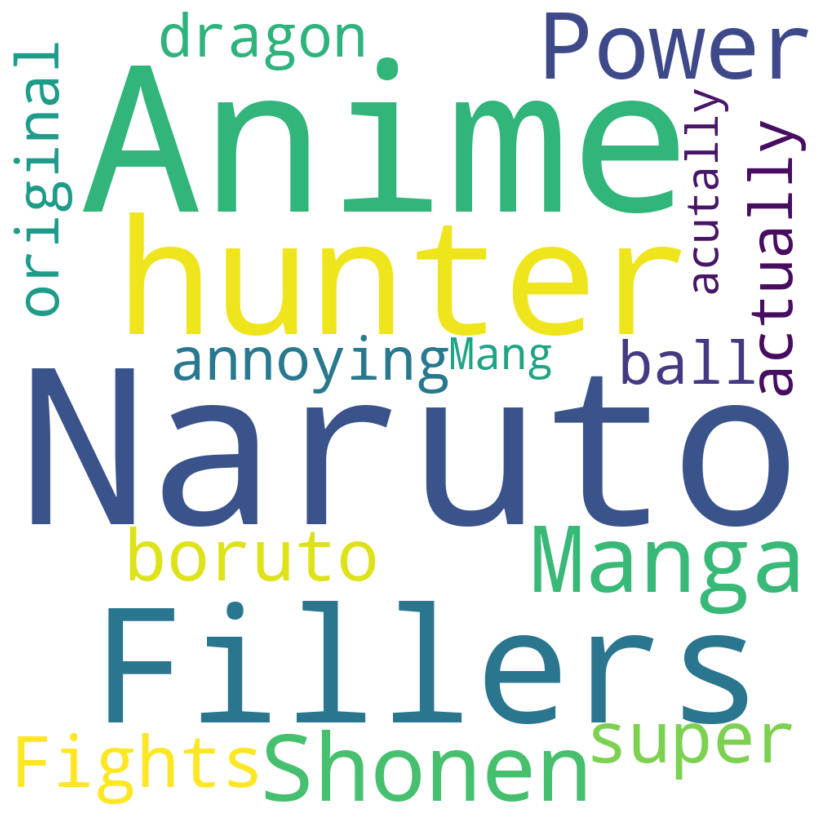

In [28]:
text=("Anime, Anime, Anime, Anime, Anime, Anime, Anime, Mang, Manga, Manga, Manga, Shonen, Shonen, Shonen, Power, Power, Power, Fights, Fights, Fights, Naruto, Naruto, Naruto, Naruto, Naruto, Naruto, Naruto, Naruto, Fillers, Fillers, Fillers, Fillers, boruto, boruto, boruto, actually, actually, acutally, hunter, hunter, hunter, hunter, original, original, annoying, annoying, super, super, super, dragon, dragon, ball, ball,  ")
# Create the wordcloud object
wordcloud = WordCloud(background_color='white', width=1000, height=1000, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [25]:
genre_list = []
def list_to_string(tags):
    global genre_list
    genre_list += (eval(tags))
    return 0

anime_df['tags'].apply(list_to_string)

0       0
1       0
2       0
3       0
4       0
       ..
4695    0
4696    0
4697    0
4698    0
4699    0
Name: tags, Length: 4700, dtype: int64

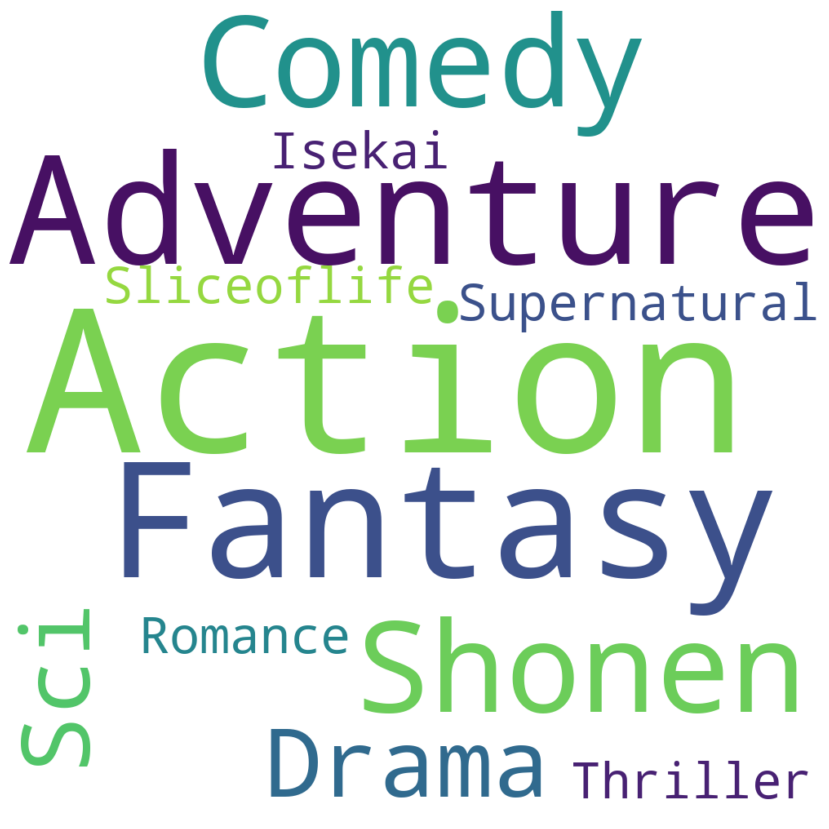

In [30]:
text=("Action Action Action, Action, Action, Fantasy, Fantasy, Fantasy, Shonen, Shonen, Adventure, Adventure, Adventure, Comedy, Comedy, Sci-i, Drama, Supernatural, Romance, Isekai, Sliceoflife, Thriller")
# Create the wordcloud object
wordcloud = WordCloud(background_color='white',width=1000, height=1000, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(25,15))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


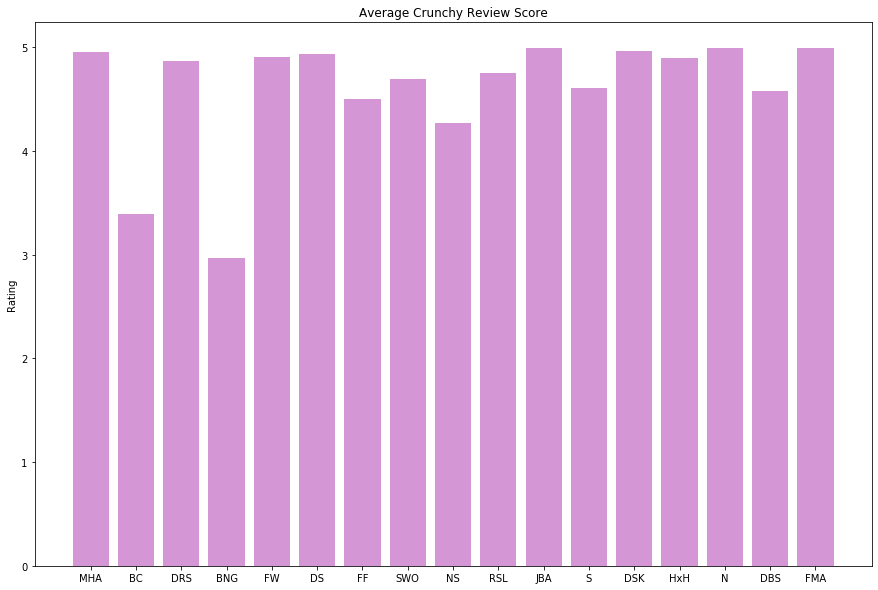

In [47]:
# plt.plot(show_list, ratings, 'ro', markersize=20)
# plt.axis([1, 2, 3, 4, 5])
# plt.show()

objects = show_list
y_pos = np.arange(len(objects))
performance = ratings
plt.figure(figsize=(15,10))
plt.bar(y_pos, performance, align='center', alpha=0.5, color='#ab2fad')
plt.xticks(y_pos, objects)
plt.ylabel('Rating')
plt.title('Average Crunchy Review Score')

plt.show()

In [ ]:
fullmetal_alchemist

In [ ]:
my_hero